a. Design a single unit perceptron for classification of a linearly separable binary dataset (placement.csv)
without using pre-defined models. Use the Perceptron() from sklearn.

   Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0
[[11. 47.]]
[-72.]
accuracy score is 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

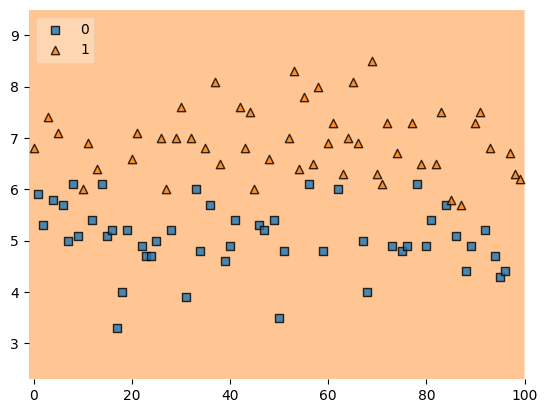

In [ ]:

# Single unit perceptron
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
df=pd.read_csv('placement.csv')
print(df.head())
X = df.iloc[:,0:2]
y = df.iloc[:,-1]
p = Perceptron()
p.fit(X,y)
print(p.coef_)
print(p.intercept_)
z=p.score(X,y)
print("accuracy score is",z)
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf=p, legend=2)

Exercise:
Design a single unit perceptron for classification of a linearly separable binary dataset without using pre-defined
models. Use the Perceptron() from sklearn.

In [ ]:
#hint-use make_classification() to generate binary dataset from sklearn
#Eg:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2,
n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1,
random_state=41,hypercube=False,class_sep=10)

Test Accuracy: 1.0


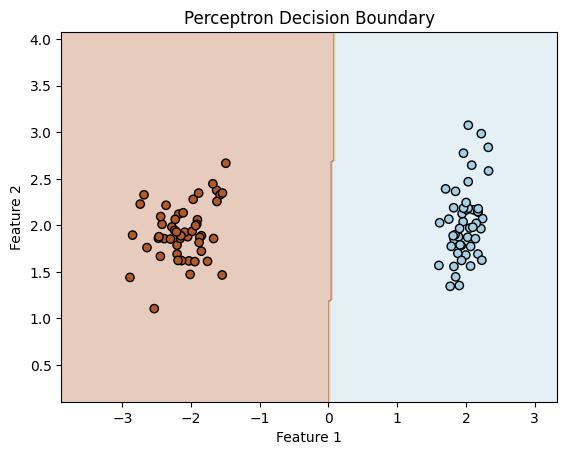

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Step 1: Create a linearly separable dataset
X, y = make_classification(n_samples=100,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           class_sep=2.0,
                           random_state=1)

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 3: Initialize and train Perceptron
model = Perceptron(max_iter=1000, eta0=0.01, random_state=1)
model.fit(X_train, y_train)

# Step 4: Accuracy
accuracy = model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

# Step 5: Visualize decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title('Perceptron Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(X, y, model)


Identify the problem with single unit Perceptron. Classify using Or-, And- and Xor-ed data and analyse the result.

[[2. 2.]]
[-2.]
[[2. 2.]]
[-1.]
[[0. 0.]]
[0.]


<Axes: >

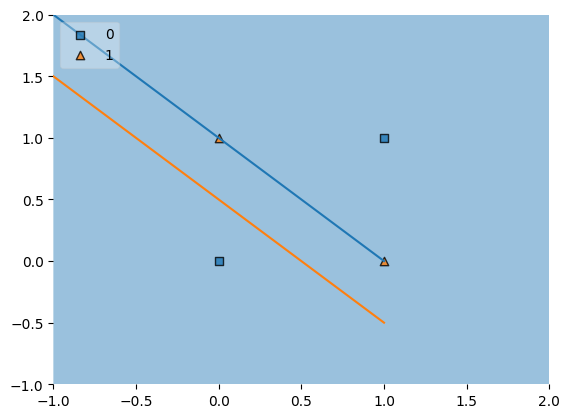

In [ ]:
# Perceptron on Or-, And- and Xor-ed data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()
or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['ouput']=[1,1,1,0]
and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['ouput']=[1,0,0,0]
xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['ouput']=[0,1,1,0]
from sklearn.linear_model import Perceptron
clf1=Perceptron()
clf2=Perceptron()
clf3=Perceptron()
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
print(clf1.coef_)
print(clf1.intercept_)
x=np.linspace(-1,1,5)
y=-x+1
plt.plot(x,y)
#sns.scatterplot(and_data['input1'],and_data['input2'],hue=and_data['ouput'],s=200)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
print(clf2.coef_)
print(clf2.intercept_)
x1=np.linspace(-1,1,5)
y1=-x+0.5
plt.plot(x1,y1)
#sns.scatterplot(or_data['input1'],or_data['input2'],hue=or_data['ouput'],s=200)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)
print(clf3.coef_)
print(clf3.intercept_)
plot_decision_regions(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values,
clf=clf3, legend=2)